In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("auto-mpg.data-original",delim_whitespace=True,names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [4]:
#df[df.horsepower.isna()]
df1 = df[~df.isna().any(axis=1)]
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
columns = ["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]

df2 = df1.copy()

origin_reference = {1:'american',2:'euro',3:'japanese'}
df2['origin_name'] = (df2['origin'].map(lambda x: origin_reference[int(x)]))

ohe = OneHotEncoder()
encoded_data= ohe.fit_transform(df2["origin_name"].values.reshape(-1, 1))

df3 =pd.concat([df2.reset_index(drop=True, inplace=False),pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out()).reset_index(drop=True, inplace=False)], axis = 1)
df3


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origin_name,x0_american,x0_euro,x0_japanese
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,american,1.0,0.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,american,1.0,0.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,american,1.0,0.0,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,american,1.0,0.0,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,american,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,american,1.0,0.0,0.0
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,euro,0.0,1.0,0.0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,american,1.0,0.0,0.0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,american,1.0,0.0,0.0


In [9]:
X = df3[columns+["x0_american","x0_euro","x0_japanese"]].drop('origin',axis=1,inplace=False)
y = df3[["mpg"]]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,x0_american,x0_euro,x0_japanese
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.0,0.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.0,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.0,0.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.0,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
387,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,0.0,0.0
388,4.0,97.0,52.0,2130.0,24.6,82.0,0.0,1.0,0.0
389,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,0.0,0.0
390,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,0.0,0.0


from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, Normalizer

In [11]:
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args, titles=cycle([''])):
    """https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side"""
    html_str = '<table><tr>'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<td style="vertical-align:top"><h2 style="text-align: center;">{title}</h2>'
        html_str += df.to_html().replace('table', 'table style="display:inline"') + '</td>'
    html_str += '</tr></table>'
    display_html(html_str, raw=True)


In [92]:
import math
def eval_model(reg,X,y,cv=5,trunc_val=2):
    metrics = ['max_error','neg_mean_absolute_error','neg_root_mean_squared_error','r2']
    
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=cv,n_jobs=3,return_train_score=True,scoring=metrics))

    cv = cv.applymap(lambda x: math.trunc(10**trunc_val * x) / 10**trunc_val)
    
    train = ['train_max_error','train_neg_mean_absolute_error','train_neg_root_mean_squared_error','train_r2']
    test  = ['test_max_error','test_neg_mean_absolute_error','test_neg_root_mean_squared_error','test_r2']
    
    for i in ['train_neg_mean_absolute_error','train_neg_root_mean_squared_error','test_neg_mean_absolute_error','test_neg_root_mean_squared_error']:
        cv[i] = -cv[i].copy()
    
    train_df = cv[train].copy()
    test_df  = cv[test].copy()
    
    train_df.rename(columns={'train_max_error':"Max Error",'train_neg_mean_absolute_error':"MAE",'train_neg_root_mean_squared_error':"RMSE",'train_r2':"R²"},inplace=True)
    test_df.rename(columns={'test_max_error':"Max Error",'test_neg_mean_absolute_error':"MAE",'test_neg_root_mean_squared_error':"RMSE",'test_r2':"R²"},inplace=True)
    print("Train means:\n",train_df.mean())
    print("Test means:\n",test_df.mean())
    
    display_side_by_side(train_df,test_df,titles=["Train Scores","Test Scores"])

In [93]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [230]:
reg=make_pipeline(LinearRegression())
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -12.976
MAE           2.436
RMSE          3.200
R²            0.822
dtype: float64
Test means:
 Max Error   -10.396
MAE           3.040
RMSE          3.778
R²            0.590
dtype: float64


,Max Error,MAE,RMSE,R²
0,-12.90,2.54,3.32,0.81
1,-13.03,2.52,3.31,0.82
2,-13.14,2.66,3.44,0.82
3,-13.04,2.32,3.11,0.84
4,-12.77,2.14,2.82,0.82
,Max Error,MAE,RMSE,R²
0,-8.98,3.36,3.87,0.55
1,-9.30,2.71,3.29,0.69
2,-8.34,1.94,2.52,0.81
3,-10.05,3.23,3.97,0.67


In [271]:
reg=make_pipeline(Normalizer(),Ridge(alpha=1e-5))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -12.842
MAE           2.226
RMSE          3.132
R²            0.828
dtype: float64
Test means:
 Max Error   -10.094
MAE           2.548
RMSE          3.364
R²            0.644
dtype: float64


,Max Error,MAE,RMSE,R²
0,-13.24,2.44,3.41,0.80
1,-12.74,2.32,3.20,0.83
2,-12.89,2.40,3.38,0.82
3,-13.84,2.22,3.24,0.83
4,-11.50,1.75,2.43,0.86
,Max Error,MAE,RMSE,R²
0,-7.20,1.80,2.31,0.84
1,-11.13,2.37,3.29,0.69
2,-7.01,1.87,2.41,0.82
3,-9.89,2.25,3.01,0.81


In [272]:
reg=make_pipeline(Normalizer(), Lasso(alpha=1e-5,max_iter=10000))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -12.640
MAE           2.214
RMSE          3.108
R²            0.832
dtype: float64
Test means:
 Max Error   -10.334
MAE           2.530
RMSE          3.352
R²            0.644
dtype: float64


,Max Error,MAE,RMSE,R²
0,-12.81,2.42,3.38,0.81
1,-12.63,2.31,3.18,0.83
2,-12.75,2.39,3.36,0.83
3,-13.49,2.20,3.20,0.83
4,-11.52,1.75,2.42,0.86
,Max Error,MAE,RMSE,R²
0,-7.95,1.70,2.20,0.85
1,-11.44,2.35,3.31,0.68
2,-7.15,1.88,2.40,0.82
3,-9.88,2.31,3.08,0.80


In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [273]:
reg=make_pipeline(Normalizer(),DecisionTreeRegressor(max_depth= 4,random_state=42))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -11.612
MAE           1.952
RMSE          2.696
R²            0.870
dtype: float64
Test means:
 Max Error   -14.366
MAE           2.886
RMSE          3.858
R²            0.564
dtype: float64


,Max Error,MAE,RMSE,R²
0,-13.00,2.10,2.91,0.85
1,-12.17,2.00,2.75,0.87
2,-12.04,2.05,2.90,0.87
3,-11.77,2.01,2.79,0.87
4,-9.08,1.60,2.13,0.89
,Max Error,MAE,RMSE,R²
0,-13.39,2.43,3.31,0.67
1,-17.10,2.76,3.92,0.56
2,-8.04,2.14,2.76,0.77
3,-14.89,2.82,3.63,0.72


In [237]:
reg=make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth= 4,random_state=42))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -10.774
MAE           1.850
RMSE          2.504
R²            0.888
dtype: float64
Test means:
 Max Error   -11.354
MAE           2.918
RMSE          3.834
R²            0.576
dtype: float64


,Max Error,MAE,RMSE,R²
0,-11.57,1.97,2.71,0.87
1,-11.76,1.92,2.65,0.88
2,-11.00,1.96,2.68,0.89
3,-11.33,1.84,2.45,0.90
4,-8.21,1.56,2.03,0.90
,Max Error,MAE,RMSE,R²
0,-7.00,1.87,2.45,0.82
1,-10.76,1.93,2.58,0.80
2,-11.09,3.15,4.08,0.50
3,-11.10,3.92,4.98,0.48


In [239]:
reg=make_pipeline( DecisionTreeRegressor(max_depth= 6,random_state=42))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -8.732
MAE          1.202
RMSE         1.718
R²           0.946
dtype: float64
Test means:
 Max Error   -14.820
MAE           2.844
RMSE          3.890
R²            0.562
dtype: float64


,Max Error,MAE,RMSE,R²
0,-8.90,1.33,1.89,0.94
1,-9.09,1.27,1.83,0.94
2,-10.20,1.25,1.86,0.94
3,-8.47,1.21,1.71,0.95
4,-7.00,0.95,1.30,0.96
,Max Error,MAE,RMSE,R²
0,-10.00,1.75,2.48,0.81
1,-11.83,1.83,2.49,0.82
2,-19.39,3.26,4.48,0.40
3,-15.14,3.53,4.96,0.49


In [101]:
from sklearn.ensemble import RandomForestRegressor

In [241]:
reg=make_pipeline( RandomForestRegressor(n_estimators = 100,max_depth=6, random_state=0))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -6.592
MAE          1.150
RMSE         1.544
R²           0.954
dtype: float64
Test means:
 Max Error   -9.304
MAE          2.190
RMSE         2.882
R²           0.744
dtype: float64


,Max Error,MAE,RMSE,R²
0,-7.56,1.23,1.66,0.95
1,-7.36,1.22,1.65,0.95
2,-7.44,1.23,1.66,0.95
3,-6.28,1.10,1.49,0.96
4,-4.32,0.97,1.26,0.96
,Max Error,MAE,RMSE,R²
0,-4.27,1.40,1.81,0.90
1,-9.96,1.75,2.41,0.83
2,-6.11,1.73,2.16,0.86
3,-8.62,2.51,3.21,0.78


In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [244]:
reg=make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=2,interaction_only=False),Lasso(alpha=1e-5,max_iter=1000000))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -11.164
MAE           1.682
RMSE          2.356
R²            0.902
dtype: float64
Test means:
 Max Error   -10.102
MAE           2.590
RMSE          3.356
R²            0.658
dtype: float64


,Max Error,MAE,RMSE,R²
0,-11.81,1.79,2.50,0.89
1,-12.14,1.76,2.49,0.89
2,-11.78,1.83,2.56,0.90
3,-12.30,1.63,2.35,0.91
4,-7.79,1.40,1.88,0.92
,Max Error,MAE,RMSE,R²
0,-15.30,3.12,4.05,0.51
1,-8.67,1.83,2.55,0.81
2,-6.34,1.59,2.04,0.87
3,-8.55,2.51,3.23,0.78


In [274]:
reg=make_pipeline(Normalizer(),PolynomialFeatures(degree=2,interaction_only=False),Ridge(alpha=1e-5))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -13.024
MAE           2.194
RMSE          3.084
R²            0.834
dtype: float64
Test means:
 Max Error   -10.028
MAE           2.500
RMSE          3.322
R²            0.650
dtype: float64


,Max Error,MAE,RMSE,R²
0,-13.30,2.40,3.35,0.81
1,-12.80,2.30,3.17,0.83
2,-13.39,2.36,3.32,0.83
3,-14.29,2.18,3.18,0.83
4,-11.34,1.73,2.40,0.87
,Max Error,MAE,RMSE,R²
0,-7.37,1.69,2.24,0.85
1,-11.10,2.32,3.24,0.69
2,-6.84,1.88,2.39,0.82
3,-9.66,2.26,3.02,0.81


In [106]:
from sklearn.feature_selection import SequentialFeatureSelector

In [247]:
lr = LinearRegression()
reg=make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=2,interaction_only=False),SequentialFeatureSelector(lr,n_features_to_select="auto",direction="forward",cv=None),lr)
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -11.496
MAE           1.844
RMSE          2.518
R²            0.888
dtype: float64
Test means:
 Max Error   -9.322
MAE          2.512
RMSE         3.224
R²           0.686
dtype: float64


,Max Error,MAE,RMSE,R²
0,-12.42,1.96,2.68,0.88
1,-11.94,1.95,2.65,0.88
2,-11.93,1.98,2.73,0.88
3,-12.82,1.84,2.55,0.89
4,-8.37,1.49,1.98,0.91
,Max Error,MAE,RMSE,R²
0,-10.35,2.87,3.54,0.62
1,-8.89,1.87,2.48,0.82
2,-5.96,1.68,2.17,0.85
3,-10.08,2.30,3.13,0.79


In [142]:
from sklearn.ensemble import GradientBoostingRegressor

In [249]:
reg=make_pipeline( GradientBoostingRegressor(random_state=0))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -4.358
MAE          1.014
RMSE         1.330
R²           0.964
dtype: float64
Test means:
 Max Error   -8.700
MAE          2.172
RMSE         2.836
R²           0.758
dtype: float64


,Max Error,MAE,RMSE,R²
0,-5.06,1.09,1.41,0.96
1,-4.54,1.07,1.39,0.96
2,-4.82,1.07,1.42,0.96
3,-3.90,0.98,1.31,0.97
4,-3.47,0.86,1.12,0.97
,Max Error,MAE,RMSE,R²
0,-5.12,1.51,1.93,0.88
1,-7.29,1.65,2.28,0.85
2,-7.62,1.91,2.43,0.82
3,-7.85,2.50,3.13,0.79


In [145]:
from sklearn.ensemble import BaggingRegressor

In [251]:
dt = DecisionTreeRegressor(max_depth= 4,random_state=42)

reg=make_pipeline( BaggingRegressor(estimator=dt,n_estimators=30, random_state=0))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -8.928
MAE          1.636
RMSE         2.194
R²           0.912
dtype: float64
Test means:
 Max Error   -9.440
MAE          2.274
RMSE         2.996
R²           0.722
dtype: float64


,Max Error,MAE,RMSE,R²
0,-9.74,1.74,2.37,0.90
1,-9.99,1.71,2.33,0.91
2,-10.07,1.75,2.34,0.91
3,-8.87,1.60,2.13,0.92
4,-5.97,1.38,1.80,0.92
,Max Error,MAE,RMSE,R²
0,-5.41,1.58,2.08,0.87
1,-9.65,1.87,2.53,0.81
2,-5.22,1.69,2.10,0.86
3,-9.37,2.55,3.28,0.77


In [252]:
from sklearn.svm import SVR

In [256]:
reg=make_pipeline(StandardScaler(), SVR(C=10, epsilon=0.2))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -13.864
MAE           1.468
RMSE          2.274
R²            0.906
dtype: float64
Test means:
 Max Error   -8.850
MAE          2.130
RMSE         2.824
R²           0.752
dtype: float64


,Max Error,MAE,RMSE,R²
0,-15.00,1.54,2.38,0.90
1,-14.56,1.52,2.36,0.90
2,-15.25,1.57,2.43,0.91
3,-14.35,1.46,2.30,0.91
4,-10.16,1.25,1.90,0.91
,Max Error,MAE,RMSE,R²
0,-8.20,1.80,2.39,0.83
1,-7.58,1.61,2.11,0.87
2,-4.87,1.52,1.96,0.88
3,-8.85,2.16,2.85,0.83


In [255]:
reg=make_pipeline(MinMaxScaler(), SVR(C=10, epsilon=0.2))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -13.672
MAE           1.614
RMSE          2.428
R²            0.894
dtype: float64
Test means:
 Max Error   -8.474
MAE          2.086
RMSE         2.774
R²           0.756
dtype: float64


,Max Error,MAE,RMSE,R²
0,-14.53,1.71,2.54,0.89
1,-13.97,1.69,2.55,0.89
2,-15.01,1.72,2.58,0.89
3,-14.16,1.59,2.45,0.90
4,-10.69,1.36,2.02,0.90
,Max Error,MAE,RMSE,R²
0,-5.88,1.67,2.16,0.86
1,-8.64,1.51,2.11,0.87
2,-4.77,1.43,1.85,0.89
3,-8.80,2.14,2.91,0.82


In [257]:
reg=make_pipeline( SVR(C=10, epsilon=0.2))
eval_model(reg,normalize(X,axis=0),y.values.ravel())

Train means:
 Max Error   -17.100
MAE           2.196
RMSE          3.296
R²            0.812
dtype: float64
Test means:
 Max Error   -12.096
MAE           2.952
RMSE          3.914
R²            0.500
dtype: float64


,Max Error,MAE,RMSE,R²
0,-17.40,2.36,3.43,0.80
1,-16.71,2.32,3.39,0.81
2,-17.78,2.35,3.53,0.81
3,-17.95,2.24,3.52,0.80
4,-15.66,1.71,2.61,0.84
,Max Error,MAE,RMSE,R²
0,-11.41,2.03,2.92,0.74
1,-10.38,2.26,3.04,0.73
2,-6.48,1.80,2.31,0.84
3,-14.05,2.97,3.99,0.67


In [258]:
from sklearn.ensemble import AdaBoostRegressor

In [261]:
reg=make_pipeline(AdaBoostRegressor(random_state=0, n_estimators=100))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -5.668
MAE          1.916
RMSE         2.336
R²           0.904
dtype: float64
Test means:
 Max Error   -9.600
MAE          2.418
RMSE         3.182
R²           0.700
dtype: float64


,Max Error,MAE,RMSE,R²
0,-6.50,2.08,2.56,0.89
1,-5.66,1.95,2.39,0.90
2,-5.88,2.04,2.49,0.90
3,-5.77,1.96,2.36,0.91
4,-4.53,1.55,1.88,0.92
,Max Error,MAE,RMSE,R²
0,-6.35,2.04,2.56,0.80
1,-10.83,2.12,2.91,0.75
2,-4.37,1.70,2.09,0.86
3,-10.38,2.67,3.53,0.74


In [265]:
reg=make_pipeline(AdaBoostRegressor( Lasso(alpha=1e-5,max_iter=1000000),random_state=0, n_estimators=100))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -12.472
MAE           2.530
RMSE          3.252
R²            0.814
dtype: float64
Test means:
 Max Error   -9.942
MAE          2.956
RMSE         3.684
R²           0.616
dtype: float64


,Max Error,MAE,RMSE,R²
0,-12.51,2.58,3.34,0.81
1,-12.32,2.62,3.38,0.81
2,-13.38,2.73,3.50,0.81
3,-12.35,2.45,3.17,0.83
4,-11.80,2.27,2.87,0.81
,Max Error,MAE,RMSE,R²
0,-8.47,3.23,3.72,0.59
1,-9.78,2.73,3.38,0.67
2,-7.72,1.92,2.49,0.81
3,-8.84,3.34,4.03,0.66


In [268]:
reg=make_pipeline(AdaBoostRegressor(Ridge(alpha=1e-5),random_state=0, n_estimators=100))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -12.472
MAE           2.530
RMSE          3.252
R²            0.814
dtype: float64
Test means:
 Max Error   -9.942
MAE          2.956
RMSE         3.684
R²           0.616
dtype: float64


,Max Error,MAE,RMSE,R²
0,-12.51,2.58,3.34,0.81
1,-12.32,2.62,3.38,0.81
2,-13.38,2.73,3.50,0.81
3,-12.35,2.45,3.17,0.83
4,-11.80,2.27,2.87,0.81
,Max Error,MAE,RMSE,R²
0,-8.47,3.23,3.72,0.59
1,-9.78,2.73,3.38,0.67
2,-7.72,1.92,2.49,0.81
3,-8.84,3.34,4.03,0.66


In [206]:
from sklearn.neighbors import KNeighborsRegressor

In [212]:
reg=make_pipeline(KNeighborsRegressor(n_neighbors=2))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -9.682
MAE          1.778
RMSE         2.422
R²           0.896
dtype: float64
Test means:
 Max Error   -14.288
MAE           3.742
RMSE          4.790
R²            0.316
dtype: float64


,Max Error,MAE,RMSE,R²
0,-11.29,1.99,2.66,0.88
1,-8.50,1.76,2.38,0.90
2,-11.29,2.05,2.78,0.88
3,-11.29,1.80,2.56,0.89
4,-6.04,1.29,1.73,0.93
,Max Error,MAE,RMSE,R²
0,-10.19,3.06,4.06,0.51
1,-19.70,3.44,4.76,0.35
2,-10.05,2.67,3.42,0.65
3,-10.60,3.42,4.18,0.64


In [275]:
reg=make_pipeline(Normalizer(),KNeighborsRegressor(n_neighbors=2))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -9.536
MAE          1.374
RMSE         1.956
R²           0.930
dtype: float64
Test means:
 Max Error   -11.866
MAE           2.978
RMSE          3.986
R²            0.526
dtype: float64


,Max Error,MAE,RMSE,R²
0,-10.00,1.55,2.17,0.92
1,-10.25,1.40,2.00,0.93
2,-10.19,1.43,2.07,0.93
3,-10.19,1.36,2.01,0.93
4,-7.05,1.13,1.53,0.94
,Max Error,MAE,RMSE,R²
0,-6.00,1.92,2.47,0.81
1,-12.00,2.76,3.90,0.56
2,-10.19,2.53,3.46,0.64
3,-10.89,3.00,3.92,0.68


In [269]:
reg=make_pipeline(MinMaxScaler(),KNeighborsRegressor(n_neighbors=2))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -8.710
MAE          1.164
RMSE         1.668
R²           0.946
dtype: float64
Test means:
 Max Error   -10.528
MAE           2.524
RMSE          3.330
R²            0.662
dtype: float64


,Max Error,MAE,RMSE,R²
0,-8.89,1.29,1.84,0.94
1,-10.19,1.24,1.77,0.94
2,-10.19,1.17,1.70,0.95
3,-10.19,1.13,1.67,0.95
4,-4.09,0.99,1.36,0.95
,Max Error,MAE,RMSE,R²
0,-7.50,1.63,2.24,0.85
1,-5.25,1.63,2.10,0.87
2,-9.60,2.10,2.76,0.77
3,-12.29,3.15,4.18,0.63


In [214]:
reg=make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=2))
eval_model(reg,X,y.values.ravel())

Train means:
 Max Error   -8.212
MAE          1.178
RMSE         1.658
R²           0.948
dtype: float64
Test means:
 Max Error   -10.496
MAE           2.550
RMSE          3.336
R²            0.670
dtype: float64


,Max Error,MAE,RMSE,R²
0,-8.89,1.28,1.80,0.94
1,-8.89,1.24,1.73,0.95
2,-8.89,1.18,1.66,0.95
3,-8.89,1.16,1.68,0.95
4,-5.50,1.03,1.42,0.95
,Max Error,MAE,RMSE,R²
0,-6.00,1.80,2.42,0.82
1,-7.50,1.76,2.26,0.85
2,-8.69,2.09,2.74,0.77
3,-12.29,3.21,4.15,0.64


In [181]:
pd.DataFrame(normalize(X,axis=0))[1].max()

0.10411699157543243

In [180]:
pd.DataFrame(normalize(X))[1].max()

0.1454475224608804

In [184]:
normalize(X,axis=0,return_norm=True)

(array([[0.07050442, 0.07025037, 0.05898422, ..., 0.06388766, 0.        ,
         0.        ],
        [0.07050442, 0.08008999, 0.07486459, ..., 0.06388766, 0.        ,
         0.        ],
        [0.07050442, 0.07276748, 0.06805872, ..., 0.06388766, 0.        ,
         0.        ],
        ...,
        [0.03525221, 0.03089185, 0.03811288, ..., 0.06388766, 0.        ,
         0.        ],
        [0.03525221, 0.02745943, 0.03584426, ..., 0.06388766, 0.        ,
         0.        ],
        [0.03525221, 0.0272306 , 0.03720543, ..., 0.06388766, 0.        ,
         0.        ]]),
 array([1.13468057e+02, 4.37008401e+03, 2.20397913e+03, 6.12990660e+04,
        3.12501040e+02, 1.50608167e+03, 1.56524758e+01, 8.24621125e+00,
        8.88819442e+00]))

In [226]:
pd.DataFrame({"a":[1,2],"b":[2,6]})

,a,b
0,1,2
1,2,6


In [227]:
normalize(_)

array([[0.4472136 , 0.89442719],
       [0.31622777, 0.9486833 ]])

In [228]:
MinMaxScaler().fit_transform(pd.DataFrame({"a":[1,2],"b":[2,4]}))

array([[0., 0.],
       [1., 1.]])

<AxesSubplot: >

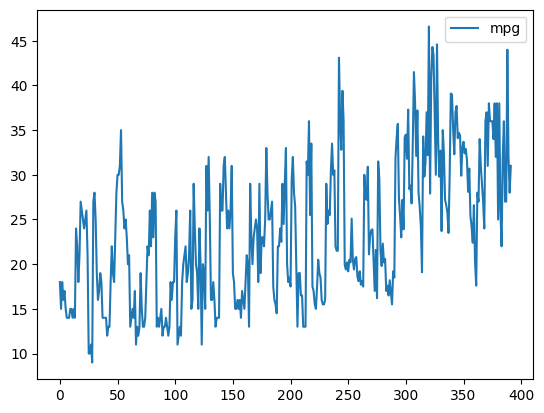

In [277]:
y.plot()